<a href="https://colab.research.google.com/github/Sufiyanyoonus/ML/blob/main/Formative_Assessment_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective:
##The objective of this assessment is to evaluate your understanding and ability to apply clustering techniques to a real-world dataset.

#Dataset
##Use the Iris dataset available in the sklearn library.


In [5]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the iris dataset
iris = load_iris()

# Create a DataFrame
df = pd.DataFrame(data=iris.data,columns=iris.feature_names )


# Display the first few rows
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [6]:
print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [7]:
# shape of the data
df.shape

(150, 4)

In [8]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [9]:
# statistical analysis
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#Data preprocessing

In [10]:
# cheking the null values in data set
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0


In [11]:
# cheking the duplicaet values
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


##Finding outliers
###it is necessary for better data and it will avoid unneccasary valuees which is not essesntial but when it comes to this  there are no outliers

In [12]:
# iqr method

# Calculate IQR for each feature
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Determine outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
outlier_counts = outliers.sum()
print(f'Outlier Counts per Feature:\n{outlier_counts}')

Outlier Counts per Feature:
sepal length (cm)    0
sepal width (cm)     4
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
iris_scaled=scaler.fit_transform(df)
print(pd.DataFrame(iris_scaled,columns=df.columns).head(10))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444
5          -0.537178          1.939791          -1.169714         -1.052180
6          -1.506521          0.788808          -1.340227         -1.183812
7          -1.021849          0.788808          -1.283389         -1.315444
8          -1.748856         -0.362176          -1.340227         -1.315444
9          -1.143017          0.098217          -1.283389         -1.447076


##Dimensionality Reduction (PCA): Sometimes, reducing the dimensionality (e.g., to 2 or 3 dimensions using PCA) is helpful for visualization and speeding up the algorithm

In [14]:
 # import PCA from skleran
from sklearn.decomposition import PCA

# apply PCA for dimentranility reduction for 2 dimnesion for better visualization
pca=PCA(n_components=2)


# fit and trandrom the scaled data
iris_pca=pca.fit_transform(iris_scaled)

# Create a DataFrame to hold the principal components
df_pca=pd.DataFrame(iris_pca,columns=["PCA1","PCA2"])
print(df_pca.head(10))

       PCA1      PCA2
0 -2.264703  0.480027
1 -2.080961 -0.674134
2 -2.364229 -0.341908
3 -2.299384 -0.597395
4 -2.389842  0.646835
5 -2.075631  1.489178
6 -2.444029  0.047644
7 -2.232847  0.223148
8 -2.334640 -1.115328
9 -2.184328 -0.469014


#A) KMeans Clustering

K-Means clustering is an unsupervised machine learning algorithm used to partition a dataset into K clusters. Each cluster is defined by its centroid, which is the mean of the points assigned to the cluster. Here's how K-Means works:

 Choose K initial centroids randomly or using a specific method
 Assign each data point to the nearest centroid based on the Euclidean distance.
 Recompute the centroids as the mean of all data points assigned to each cluster.
Repeat Steps 2 and 3 are repeated iteratively until the centroids no longer change, or a specified number of iterations is reached.
K-Means clustering is simple and efficient, but it

##Why K-Means Clustering Is Suitable for the Iris Dataset
The Iris dataset contains measurements of four features (sepal length, sepal width, petal length, and petal width) of three species of Iris flowers. Since the goal is to cluster the data points based on their similarities, K-Means is a good choice because:

The Iris dataset has natural groupings (3 species), which aligns well with the K-Means algorithm's ability to form distinct clusters.
K-Means is efficient for small-to-medium datasets like Iris.
The features in the Iris dataset allow for distance-based separation, which is suitable for K-Means' centroid-based approach.

###Finding the best k value for the data set since we are appllying the k_means

###Elbow Method:
###Run K-Means for different values of K (like 1 to 10)
###Look at how the "within-cluster variance" (WCSS) changes.
###Plot the results to see where the plot looks like an elbow.

In [ ]:
from sklearn.cluster import KMeans

# within-cluster variance"
wcss=[]
for k in range(1,11): # try k from 1 to 10 for analyzing which k is the best for the model
  kmeans=KMeans(n_clusters=k,random_state=42) # applying from 1 to 10 by for loop
  kmeans.fit(df_pca)
  wcss.append(kmeans.inertia_)  # Store the WCSS

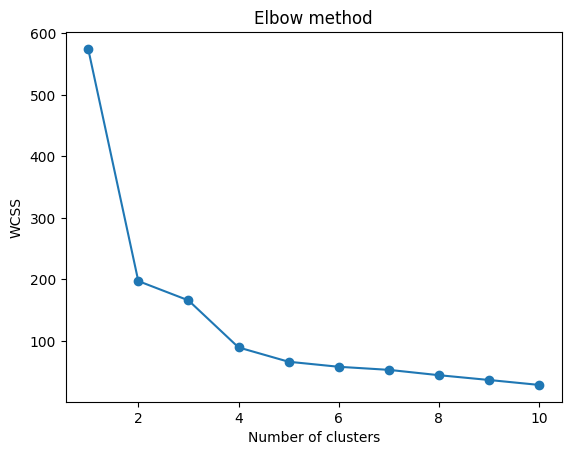

In [ ]:
# Plotting the ELbow graph
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

###Choosing K: Look for the point where the plot starts to level off (the elbow) is 3

In [ ]:
kmeans=KMeans(n_clusters=3,random_state=42) # running k means with optimal k values
kmeans.fit(df_pca) # fitting the data
clusters=kmeans.labels_ # labeling the clusters
centers=kmeans.cluster_centers_  # centers o0f the clusters

df_pca['Clusters']=clusters # ading the clusters into data frame for distinguing

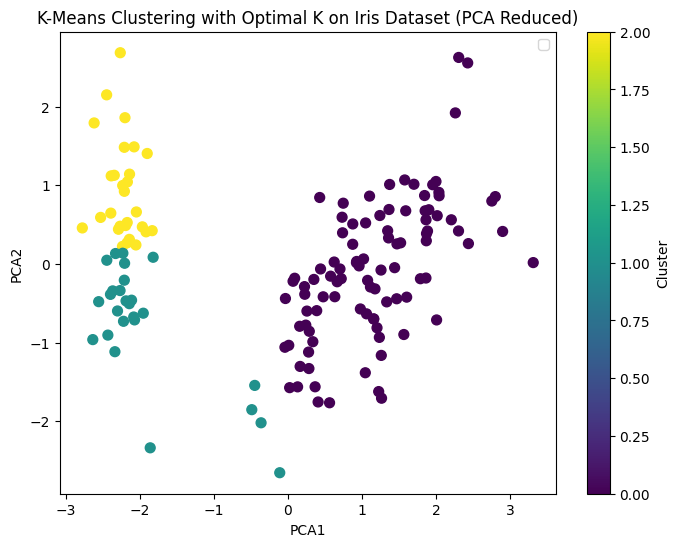

In [ ]:
import matplotlib.pyplot as plt

# computed PCA and K-Means clustering


# Create the scatter plot for the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['Clusters'], cmap='viridis', s=50)



# Add titles and labels
plt.title('K-Means Clustering with Optimal K on Iris Dataset (PCA Reduced)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


In [ ]:
# Compare with true species labels
df_pca['True Species'] = iris.target
print(df_pca.head(150))

         PCA1      PCA2  Clusters  True Species
0   -2.264703  0.480027         4             0
1   -2.080961 -0.674134         2             0
2   -2.364229 -0.341908         2             0
3   -2.299384 -0.597395         2             0
4   -2.389842  0.646835         4             0
..        ...       ...       ...           ...
145  1.870503  0.386966         3             2
146  1.564580 -0.896687         1             2
147  1.521170  0.269069         0             2
148  1.372788  1.011254         3             2
149  0.960656 -0.024332         0             2

[150 rows x 4 columns]


above we are comapring the clusteres and actual target value

#Hierarchical Clustering

##Brief Description of Hierarchical Clustering
###Hierarchical clustering is a type of unsupervised learning that builds a hierarchy of clusters. Unlike K-Means, which requires the number of clusters to be specified in advance, hierarchical clustering does not. The process works in two ways:

###Agglomerative (Bottom-Up):
Starts with each data point as its own cluster.
In each step, the algorithm merges the two closest clusters until only one cluster remains (or a certain number of clusters is reached).
###Divisive (Top-Down):
Starts with all data points in one large cluster.
In each step, the algorithm splits the cluster into smaller clusters.
The result is a tree-like structure called a dendrogram, which helps visualize how clusters are formed at each stage.

##Why Hierarchical Clustering Might Be Suitable for the Iris Dataset
###Small Dataset: The Iris dataset is relatively small (150 samples), making hierarchical clustering feasible, as it can become computationally expensive for large datasets.
###Interpretability: The dendrogram provides a clear, interpretable visualization of how different samples are grouped together, which is useful when you want to explore how the clusters are related at different levels.
###No Pre-Specified K: Hierarchical clustering doesn’t require you to predefine the number of clusters (unlike K-Means). You can choose the optimal number of clusters by cutting the dendrogram at different levels.

In [3]:
# import necessary librareries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

In [15]:
# we are going to use agglomerative clustering

# we already have clean and data preprosessed data

print(df_pca)

         PCA1      PCA2
0   -2.264703  0.480027
1   -2.080961 -0.674134
2   -2.364229 -0.341908
3   -2.299384 -0.597395
4   -2.389842  0.646835
..        ...       ...
145  1.870503  0.386966
146  1.564580 -0.896687
147  1.521170  0.269069
148  1.372788  1.011254
149  0.960656 -0.024332

[150 rows x 2 columns]


In [17]:
# since we are using aglomerative clustering each data poits is a cluster and compiling to clusters using theries similarities is Linkage
# using linkage we can link two clusters to a single cluster
z=linkage(df_pca,method="ward") # ward method reduce variance between the clusters



##Cluster analysis
##Dendrograms are a way to visually represent the results of cluster analysis, a statistical method that organizes objects into groups based on how similar they are

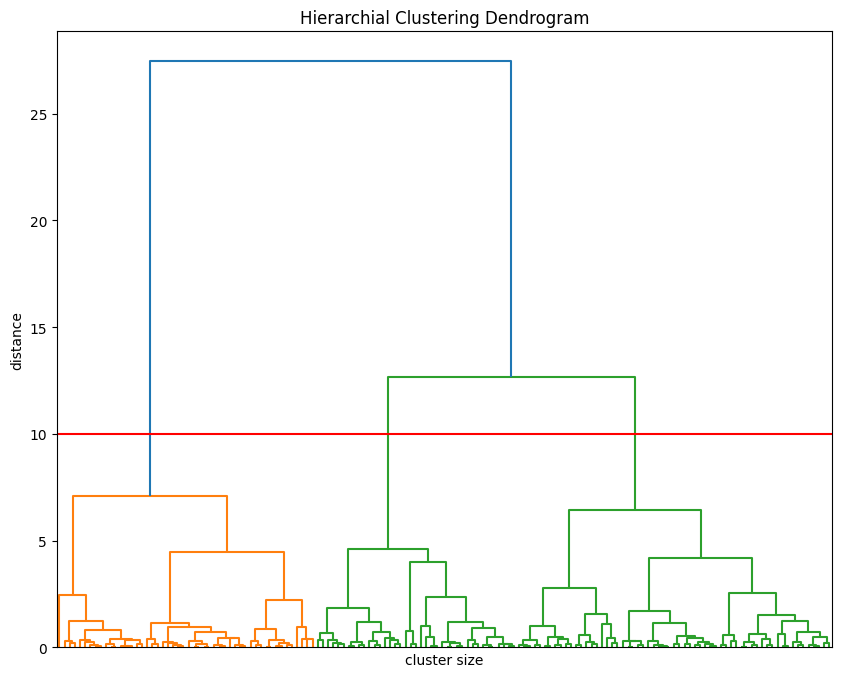

In [23]:
plt.figure(figsize=(10,8))
dendrogram(z,no_labels=True,show_contracted=True)
plt.axhline(y=10 ,color='r') # red line shows The number of vertical lines intersected by the perpendicular line represents the number of clusters in the data.
plt.title('Hierarchial Clustering Dendrogram')
plt.xlabel('cluster size')
plt.ylabel('distance')
plt.show()

# implementing the algorthm

In [33]:
agg_cluster=AgglomerativeClustering(n_clusters=3,  linkage='ward')
df_pca['Agg_clusters']=agg_cluster.fit_predict(df_pca)

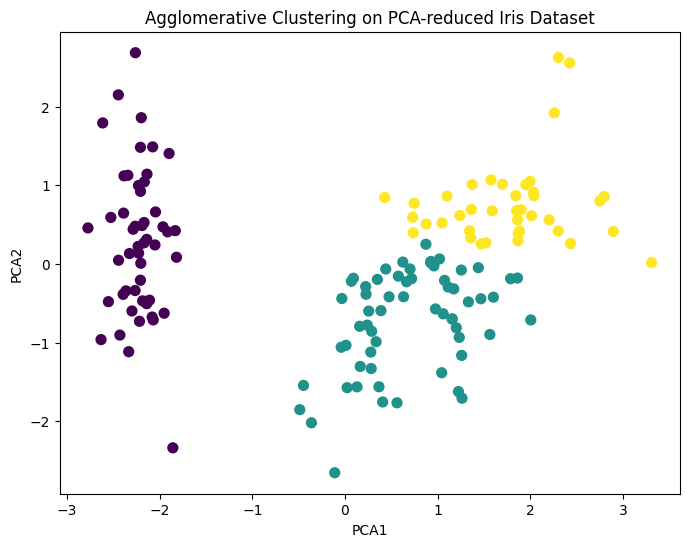

In [34]:
# Step 5: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['Agg_clusters'], cmap='viridis', s=50)
plt.title('Agglomerative Clustering on PCA-reduced Iris Dataset')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

## above figure show that our clustering well distingushed

